In [80]:
import sys

sys.path.insert(0, '../visualize/')
sys.path.insert(0, '../models/')

from tcors_functions import *
from counterprop import *
from elastic_net import *
from visualize import *

random_state = np.random.RandomState(42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression




In [107]:
df = load_features('model_features.pkl')
category_cols = ['dose', 'screen_sex', 'project', 'week', 'menthol_status', 'strength', 'site', 'cpd_bin_label']
df[category_cols] = df[category_cols].astype('category')

w12 = df[df['week'] == 'week12']
w12['cpd_bin_label'].value_counts()

1     108
3     102
4      83
2      76
0      69
5      55
6      39
7      27
8      21
9      11
11     10
12     10
10      7
14      3
16      3
13      2
15      1
Name: cpd_bin_label, dtype: int64

## Linear Model
### Elastic Net Regression



In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [121]:
# load data
enet_df = df[df['week'] == 'week12']
X = enet_df[['project', 'dose', 'screen_sex', 'screen_age', 'baseline_cpd', 'carmine_nicotine']]
enc = OneHotEncoder()
enc.fit(X[['project', 'dose', 'screen_sex']])
X_onehot = enc.transform(X)

X_onehot
# y = enet_df['cpd_bin_label']

# clf = LogisticRegression(penalty = 'elasticnet', solver="saga", l1_ratio=0.5)
# clf.fit(X, y)

/Users/tony/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- baseline_cpd
- carmine_nicotine
- screen_age
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 6 features, but OneHotEncoder is expecting 3 features as input.

In [96]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

# load data
enet_df = df[df['week'] != 'week0']
X = enet_df[['screen_id', 'week', 'project', 'dose', 'screen_sex', 'screen_age', 'baseline_cpd', 'carmine_nicotine']]
y = enet_df['cpd_bin_label']

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

# tune parameters
l1_ratios = np.arange(0.1, 1, 0.01)
tune_fit = LogisticRegressionCV(penalty="elasticnet",l1_ratios=l1_ratios, solver="saga").fit(X_train, y_train)


# cross-validated fit
# scoring = ['roc_auc_score']
# clf = ElasticNet(random_state = random_state)
# cross_val_score(estimator=clf, X=X_train, y=y_train)




# iris.target


/Users/tony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tony/opt/anaconda3/lib/python3.9/site-packages/s

{0: array([[[0.34782609, 0.34782609, 0.34782609, ..., 0.34782609,
          0.34782609, 0.34782609],
         [0.34782609, 0.34782609, 0.34782609, ..., 0.34782609,
          0.34782609, 0.34782609],
         [0.82608696, 0.7826087 , 0.7826087 , ..., 0.34782609,
          0.34782609, 0.34782609],
         ...,
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ]],
 
        [[0.34782609, 0.30434783, 0.34782609, ..., 0.34782609,
          0.34782609, 0.34782609],
         [0.34782609, 0.34782609, 0.34782609, ..., 0.34782609,
          0.34782609, 0.34782609],
         [0.86956522, 0.86956522, 0.86956522, ..., 0.34782609,
          0.34782609, 0.34782609],
         ...,
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        ,

In [98]:
tune_fit.l1_ratio_
tune_fit.

'elasticnet'

In [86]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

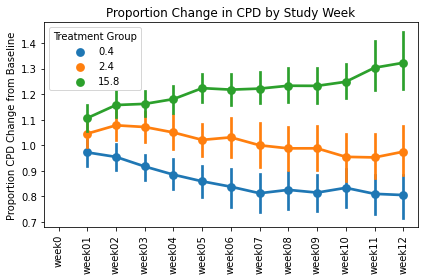

In [32]:
make_pointplot(
    df, 
    yvar = 'prp_change',
    ylabel = 'Proportion CPD Change from Baseline',
    color_var = 'dose',
    legend_title = 'Treatment Group',
    title = 'Proportion Change in CPD by Study Week',
    filename = ""
    )   

